In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
import seaborn as sns

<Figure size 800x600 with 0 Axes>

## **EDA**

In [62]:
# ingest the d
data = pd.read_csv(r"C:\Users\linto\Downloads\Gemstone Price Prediction\cubic_zirconia.csv")
data.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289


* `carat`: Diamond weight in carats.<br>
* `cut`: Diamond cutting quality.<br>
* `color`: Diamond color ranging from J (worst) to D (best).<br>
* `clarity`: Diamond clarity ranging from I1 (worst) to IF (best).<br>
* `x, y, z`: Diamond dimensions in millimeters (length, width, depth).<br>
* `depth`: Calculated percentage depth based on dimensions.<br>
* `table`: Width of the diamond's widest point at the top.<br>
* `price`: Target variable indicating the diamond's market price.<br>

In [63]:
# Last 3 rows
data.tail(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [64]:
# 3 random samples
data.sample(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
3559,3560,0.58,Ideal,E,VS1,60.8,57.0,5.41,5.42,3.29,2241
5681,5682,1.01,Good,H,SI1,60.3,64.0,6.52,6.49,3.92,4320
14528,14529,0.59,Ideal,E,SI1,61.1,56.0,5.38,5.44,3.31,1790


In [65]:
# checking missing values
data.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [66]:
# removed missing values
data = data.dropna()

In [67]:
# id is not neccesordy
data = data.drop(data.columns[data.columns.str.contains('^Unnamed', na=False)], axis=1)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26270 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26270 non-null  float64
 1   cut      26270 non-null  object 
 2   color    26270 non-null  object 
 3   clarity  26270 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26270 non-null  float64
 6   x        26270 non-null  float64
 7   y        26270 non-null  float64
 8   z        26270 non-null  float64
 9   price    26270 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.2+ MB


In [69]:
# check duplicated values
print(f"Duplicated before: {data.duplicated().sum()}")
data = data.drop_duplicates()
print(f"Duplicates after: {data.duplicated().sum()}")

Duplicated before: 34
Duplicates after: 0


In [70]:
data.shape

(26236, 10)

In [71]:
# segregae categorical and numerical data
cat_col = data.columns[data.dtypes == "object"]
num_col = data.columns[data.dtypes != "object"]

In [72]:
# numerical data
data[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26236.0,0.797620,0.476691,0.2,0.40,0.70,1.05,4.50
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60
table,26236.0,57.455877,2.230866,49.0,56.00,57.00,59.00,79.00
x,26236.0,5.728646,1.126332,0.0,4.71,5.69,6.54,10.23
y,26236.0,5.732487,1.165283,0.0,4.72,5.70,6.54,58.90
z,26236.0,3.536339,0.698608,0.0,2.90,3.52,4.04,8.06
price,26236.0,3935.926818,4019.809223,326.0,945.00,2374.00,5356.00,18818.00


In [73]:
# categorical data
data[cat_col].describe()

,cut,color,clarity
count,26236,26236,26236
unique,5,7,8
top,Ideal,G,SI1
freq,10535,5521,6402


In [74]:
for col in cat_col:
    print(data[col].value_counts())

cut
Ideal        10535
Premium       6694
Very Good     5875
Good          2376
Fair           756
Name: count, dtype: int64
color
G    5521
E    4792
F    4606
H    3984
D    3265
I    2670
J    1398
Name: count, dtype: int64
clarity
SI1     6402
VS2     5919
SI2     4436
VS1     3985
VVS2    2478
VVS1    1791
IF       871
I1       354
Name: count, dtype: int64


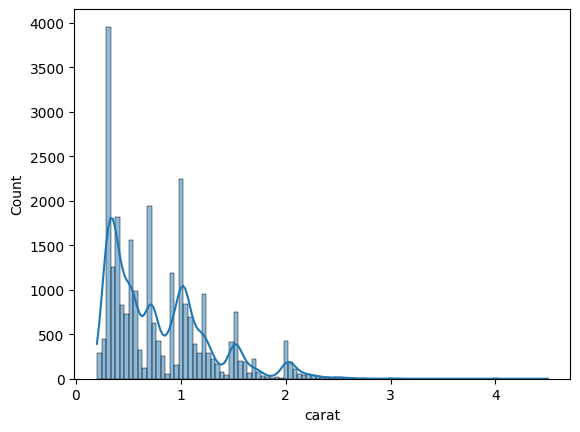

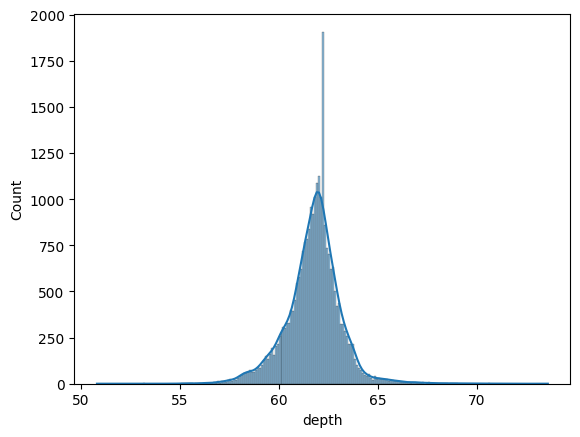

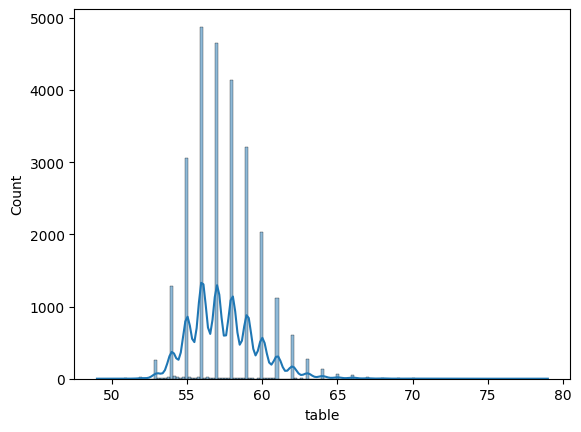

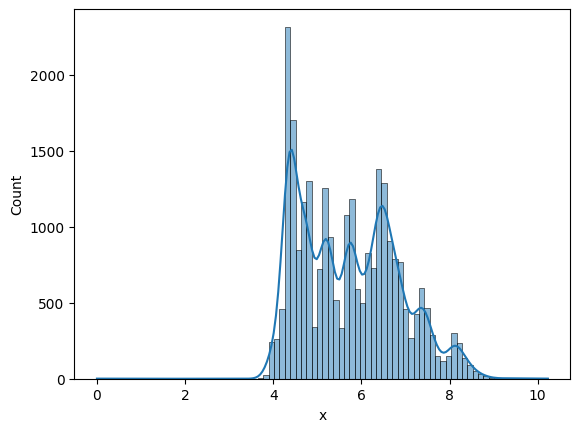

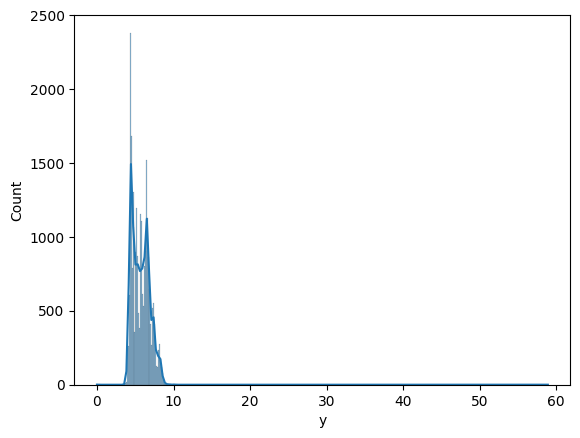

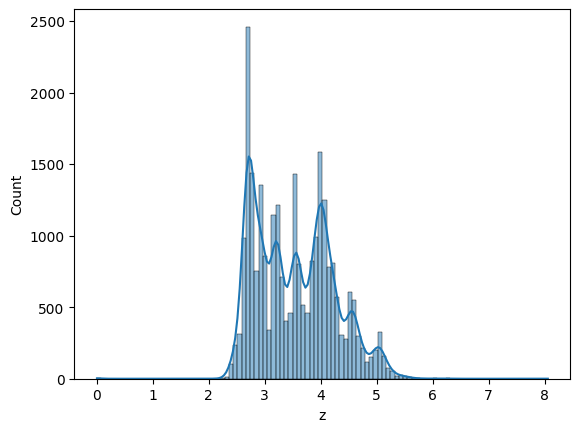

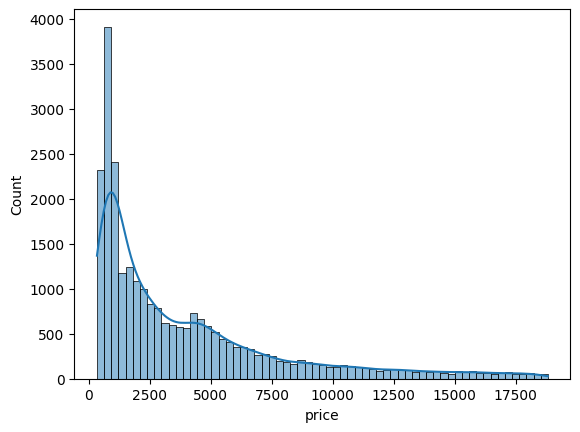

In [75]:
for col in num_col:
    sns.histplot(data[col], kde=True)
    print('\n')
    plt.show()

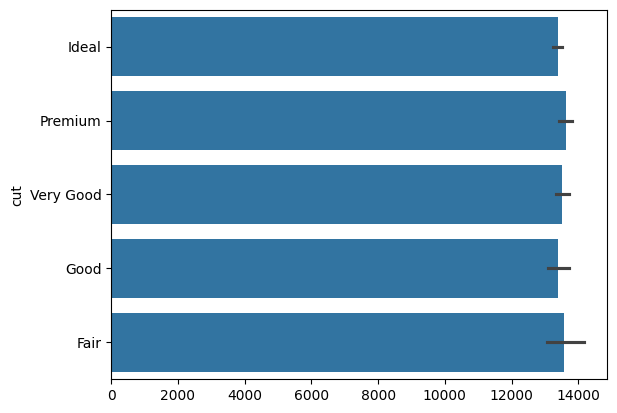

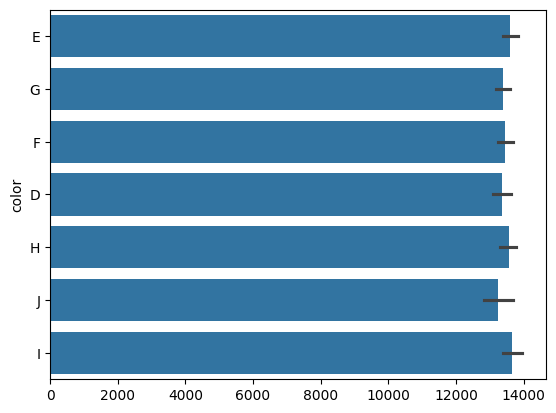

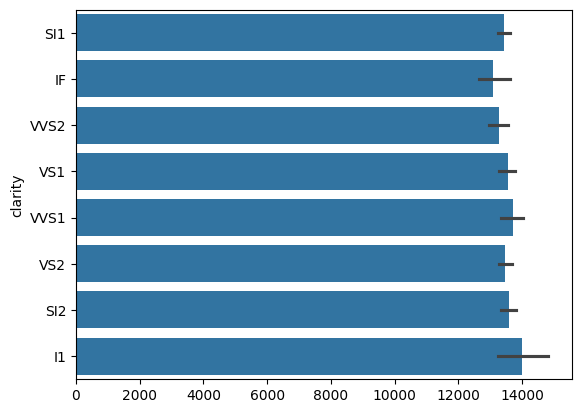

In [76]:
for col in cat_col:
    sns.barplot(data[col])
    print("\n")
    plt.show()

<Axes: >

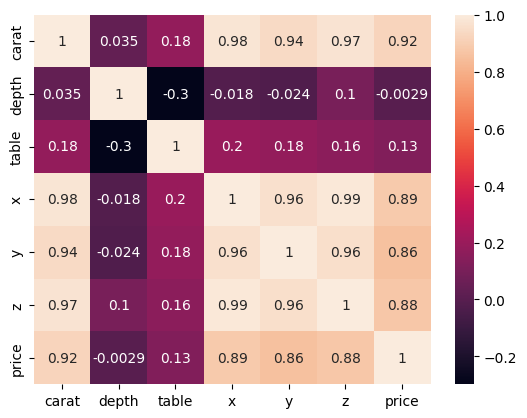

In [77]:
sns.heatmap(data[num_col].corr(), annot=True)

## **Feature Engineering**

In [78]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [79]:
# Encoding
for col in cat_col:
    print(f"{col}: {data[col].unique()}")

cut: ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
color: ['E' 'G' 'F' 'D' 'H' 'J' 'I']
clarity: ['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']


In [80]:
# ordinal encoding
cut_map = {'Ideal':5, 'Premium':4, 'Very Good':3, 'Good':2, 'Fair':1}
clarity_map = {'SI1':3, 'IF':8, 'VVS2':6, 'VS1':5, 'VVS1':7, 'VS2':4, 'SI2':2, 'I1':1}
color_map = {'E':2, 'G':4, 'F':3, 'D':1, 'H':5, 'J':7, 'I':6}

data['cut'] = data['cut'].map(cut_map)
data['clarity'] = data['clarity'].map(clarity_map)
data['color'] = data['color'].map(color_map)

data.head(3)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,62.2,60.0,6.04,6.12,3.78,6289
